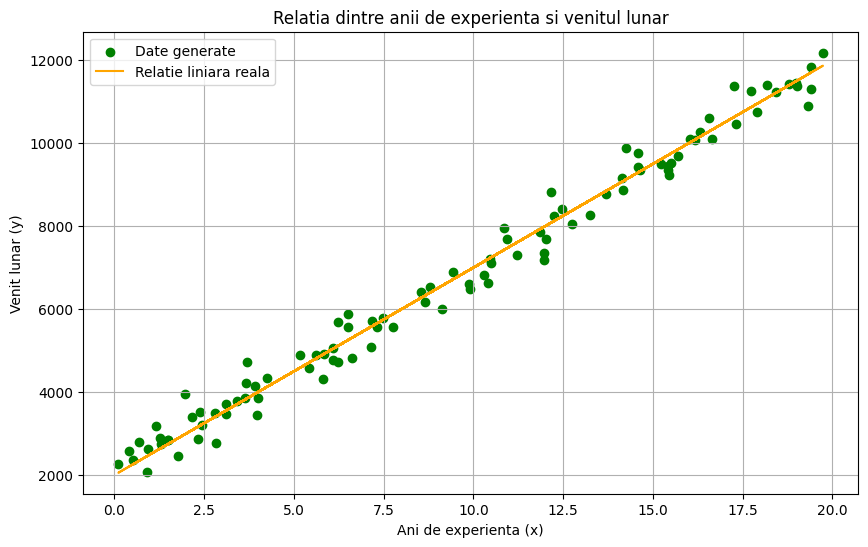

In [27]:
# a) Generarea datelor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

observations = 100
alfa = 2000
beta = 500
eps = 400

x = np.random.uniform(0, 20, observations)
sigma = np.random.normal(0, eps, observations)

y = alfa + beta * x + sigma

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="green", label="Date generate")
plt.plot(
    x, beta * x + alfa, color="orange", label="Relatie liniara reala"
)
plt.title("Relatia dintre anii de experienta si venitul lunar")
plt.xlabel("Ani de experienta (x)")
plt.ylabel("Venit lunar (y)")
plt.legend()
plt.grid()
plt.show()


Output()

Output()

               mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
intercept  2076.218  69.637  1936.980   2209.785      1.646    1.168   
sigma       367.395  27.206   317.185    420.830      0.569    0.406   
slope       491.549   6.242   479.401    503.037      0.149    0.105   

           ess_bulk  ess_tail  r_hat  
intercept    1795.0    2093.0    1.0  
sigma        2377.0    2135.0    1.0  
slope        1762.0    2050.0    1.0  


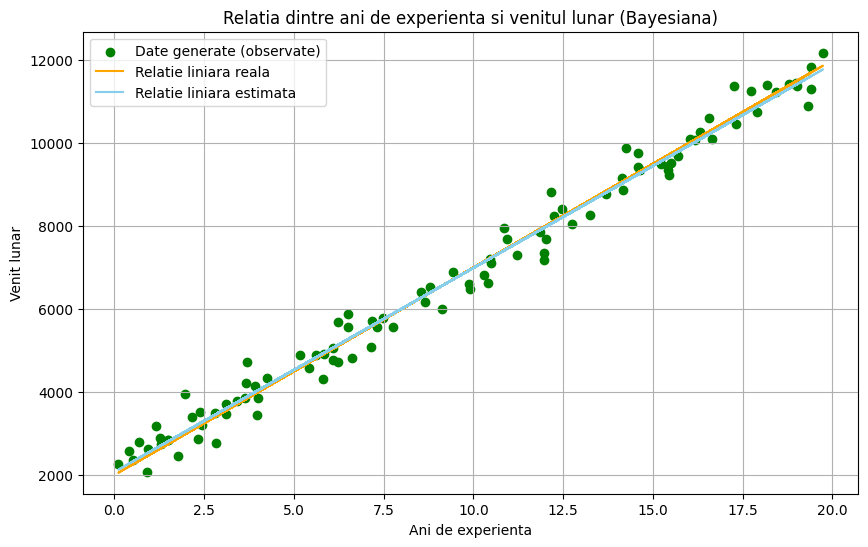

In [31]:
# b) Modelul Bayesian
import pymc as pm
import numpy as np
import arviz as az

with pm.Model() as model:
    slope = pm.Normal("slope", mu=0, sigma=1000)
    intercept = pm.Normal("intercept", mu=0, sigma=1000)
    sigma_obs = pm.HalfNormal("sigma", sigma=1000)

    mu = slope * x + intercept

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_obs, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, tune=1000, random_seed=42)

slope_estimated = trace.posterior["slope"].mean().item()
intercept_estimated = trace.posterior["intercept"].mean().item()

summary = az.summary(trace, hdi_prob=0.95)
print(summary)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="green", label="Date generate (observate)")

plt.plot(
    x,
    beta * x + alfa,
    color="orange",
    label="Relatie liniara reala"
)

plt.plot(
    x,
    slope_estimated * x + intercept_estimated,
    color="skyblue",
    label="Relatie liniara estimata",
)

plt.title("Relatia dintre ani de experienta si venitul lunar (Bayesiana)")
plt.xlabel("Ani de experienta")
plt.ylabel("Venit lunar")
plt.legend()
plt.grid()
plt.show()